**Veri Önişleme**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger('matplotlib.category').setLevel(logging.ERROR)
#burada gereksiz uyarıları ve bilgileri kapattık

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% ! important; }<style>"))
#sayfa genişliğini gösterir

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
#pandas numpy ve matplotlib modüllerini aktif ettik ve Makine öğrenmesi modellerinde metinsel sınıfları sayıya dönüştürmek için LabelEncoder kullandık.


In [4]:
df = pd.read_csv('Bank_Customer_Churn_Prediction.csv', encoding='utf-8')
#datasetini okuduk dataframe formatına aldık 

In [5]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
nan_exists_all = df.isna().any()
print(nan_exists_all)
#eksik değer kontrolü sağlandı ve true false olarak kontrol ettik

customer_id         False
credit_score        False
country             False
gender              False
age                 False
tenure              False
balance             False
products_number     False
credit_card         False
active_member       False
estimated_salary    False
churn               False
dtype: bool


In [7]:
doluluk_orani = df.notna().mean() * 100
doluluk_orani
#doluluk oranını gösterdik

customer_id         100.0
credit_score        100.0
country             100.0
gender              100.0
age                 100.0
tenure              100.0
balance             100.0
products_number     100.0
credit_card         100.0
active_member       100.0
estimated_salary    100.0
churn               100.0
dtype: float64

In [8]:
for col in ['credit_score','country', 'age', 'active_member','estimated_salary','balance']:
    df.loc[df.sample(frac=0.2).index, col] = np.nan
    #her kolonda yüzde 20 oranında eksik veri oluşturduk 

In [9]:
nan_exists_all = df.isna().any()
print(nan_exists_all)
#hangi sütunlarda eksik veri olduğunu kontrol ettik ve ekrana yazdık

customer_id         False
credit_score         True
country              True
gender              False
age                  True
tenure              False
balance              True
products_number     False
credit_card         False
active_member        True
estimated_salary     True
churn               False
dtype: bool


In [10]:
doluluk_orani = df.notna().mean() * 100
doluluk_orani
#doluluk oranını gösterdik

customer_id         100.0
credit_score         80.0
country              80.0
gender              100.0
age                  80.0
tenure              100.0
balance              80.0
products_number     100.0
credit_card         100.0
active_member        80.0
estimated_salary     80.0
churn               100.0
dtype: float64

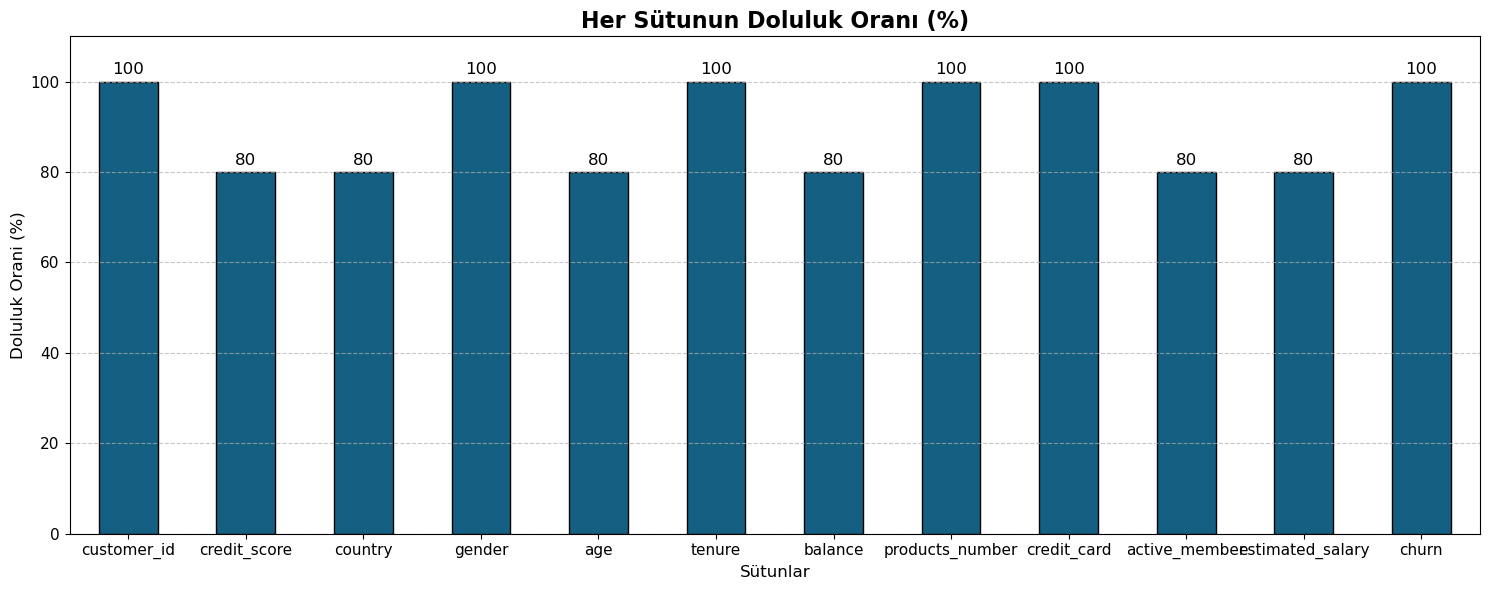

In [11]:
plt.figure(figsize=(15, 6)) #grafik boyutu
ax = doluluk_orani.plot(kind='bar', color='#156082', edgecolor='black') #çubuk grafik oluşturur grafik nesnesini ax değişkenine kaydeder
plt.title('Her Sütunun Doluluk Oranı (%)', fontsize=16, fontweight='bold')
plt.ylabel('Doluluk Orani (%)', fontsize=12)
plt.xlabel('Sütunlar', fontsize=12) 
plt.xticks(rotation=0, fontsize=11) #X eksenindeki yazıları döndürmeden gösterir her iki eksendeki yazı font boyutunu 11 yapar
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7) #sadece y eksenine çizgi ekler ve kesikli çizgi oluşturur şeffaflık derecesini de 0.7 yapar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=3, fontsize=12)
plt.ylim(0, doluluk_orani.max() * 1.1) #Y ekseninin üst sınırını ayarlar ve en büyük doluluk oranının %10 üzerine çıkararak grafiğin sıkışmasını engeller
plt.tight_layout() #Otomatik boşluk düzenleme yapar
plt.show()

In [12]:
doluluk_sayisi = df.notna().sum()
doluluk_sayisi
#doluluk sayısını gösterdik

customer_id         10000
credit_score         8000
country              8000
gender              10000
age                  8000
tenure              10000
balance              8000
products_number     10000
credit_card         10000
active_member        8000
estimated_salary     8000
churn               10000
dtype: int64

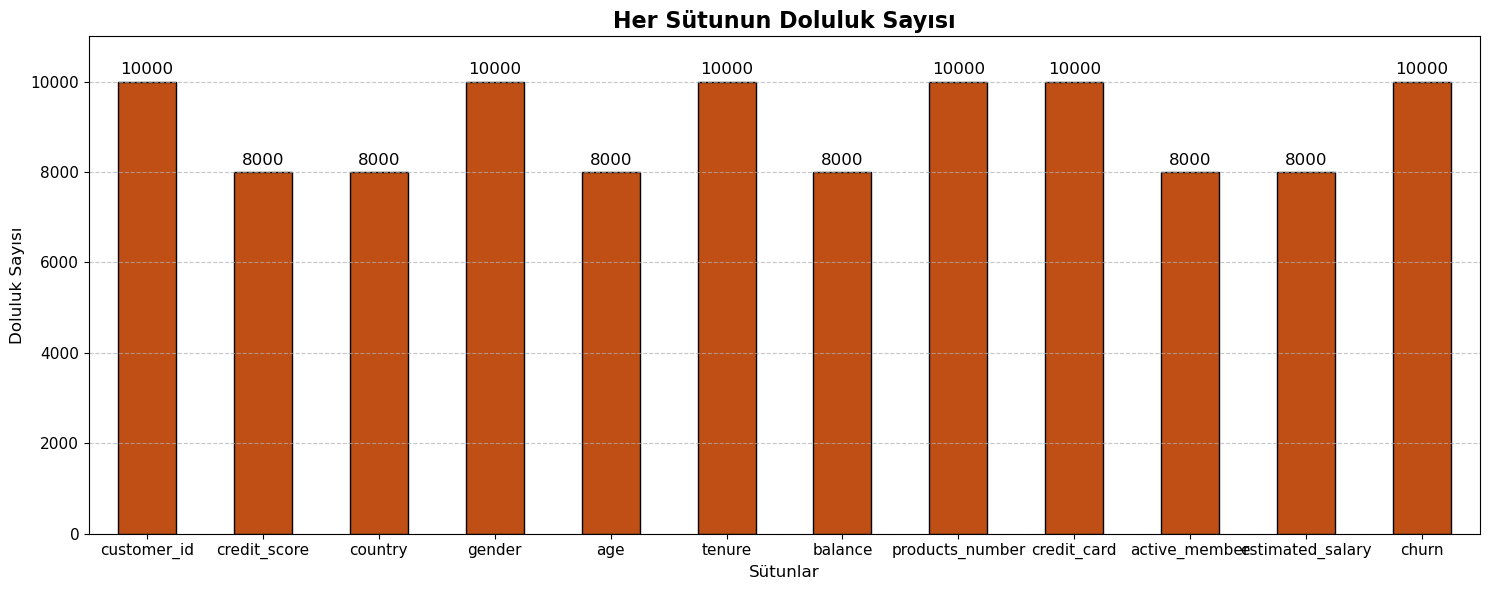

In [13]:
plt.figure(figsize=(15, 6))
ax = doluluk_sayisi.plot(kind='bar', color='#C04F15', edgecolor='black')
plt.title('Her Sütunun Doluluk Sayısı', fontsize=16, fontweight='bold')
plt.ylabel('Doluluk Sayısı', fontsize=12)
plt.xlabel('Sütunlar', fontsize=12)
plt.xticks(rotation=0, fontsize=11) # x eksenindeki yazıları döndürmeden 11 punto olacak şekilde gösterir
plt.yticks(fontsize=11) # y eksenindeki yazıların font boyutunu 11 yapar.
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=3, fontsize=12) #çubukların üzerine değer etiketlerini ekler
plt.ylim(0, doluluk_sayisi.max() * 1.1) # y ekseninin üst sınırını en büyük değerin biraz üzerine ayarlar
plt.tight_layout()
plt.show()

In [14]:
df['credit_score'].mean()

np.float64(650.13675)

In [15]:
df['age'].mean()

np.float64(38.940375)

In [16]:
df['balance'].mean()

np.float64(76243.56520750001)

In [17]:
df['country'].mode()[0]
#burda modunu almamızın nedeni sayısal değer olmamasıdır

'France'

In [18]:
df['credit_score'].fillna(df['credit_score'].mean(), inplace=True)
df['age'].fillna(df['age'].mean(), inplace=True)
df['balance'].fillna(df['balance'].mean(), inplace=True)
df['estimated_salary'].fillna(df['estimated_salary'].mean(), inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['active_member'].fillna(df['active_member'].mode()[0], inplace=True)
#sayısal sütunlardaki boşlukları o sütunun ortalamasıyla doldurur
#kategorik sütunlardaki boşlukları ise o sütunun en sık görülen değeriyle (mod) doldurur

In [19]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619.00000,France,Female,38.940375,2,76243.565208,1,1,1.0,101348.88000,1
1,15647311,608.00000,Spain,Female,41.000000,1,83807.860000,1,0,1.0,99977.49419,0
2,15619304,502.00000,France,Female,42.000000,8,76243.565208,3,1,0.0,113931.57000,1
3,15701354,699.00000,France,Female,39.000000,1,0.000000,2,0,1.0,93826.63000,0
4,15737888,850.00000,Spain,Female,43.000000,2,125510.820000,1,1,1.0,99977.49419,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771.00000,France,Male,39.000000,5,0.000000,2,1,0.0,96270.64000,0
9996,15569892,516.00000,France,Male,38.940375,10,57369.610000,1,1,1.0,101699.77000,0
9997,15584532,709.00000,France,Female,36.000000,7,0.000000,1,0,1.0,42085.58000,1
9998,15682355,772.00000,France,Male,42.000000,3,75075.310000,2,1,0.0,92888.52000,1


In [20]:
nan_exists_all = df.isna().any()
print(nan_exists_all)

customer_id         False
credit_score        False
country             False
gender              False
age                 False
tenure              False
balance             False
products_number     False
credit_card         False
active_member       False
estimated_salary    False
churn               False
dtype: bool


In [21]:
doluluk_orani = df.notna().mean() * 100
doluluk_orani

customer_id         100.0
credit_score        100.0
country             100.0
gender              100.0
age                 100.0
tenure              100.0
balance             100.0
products_number     100.0
credit_card         100.0
active_member       100.0
estimated_salary    100.0
churn               100.0
dtype: float64

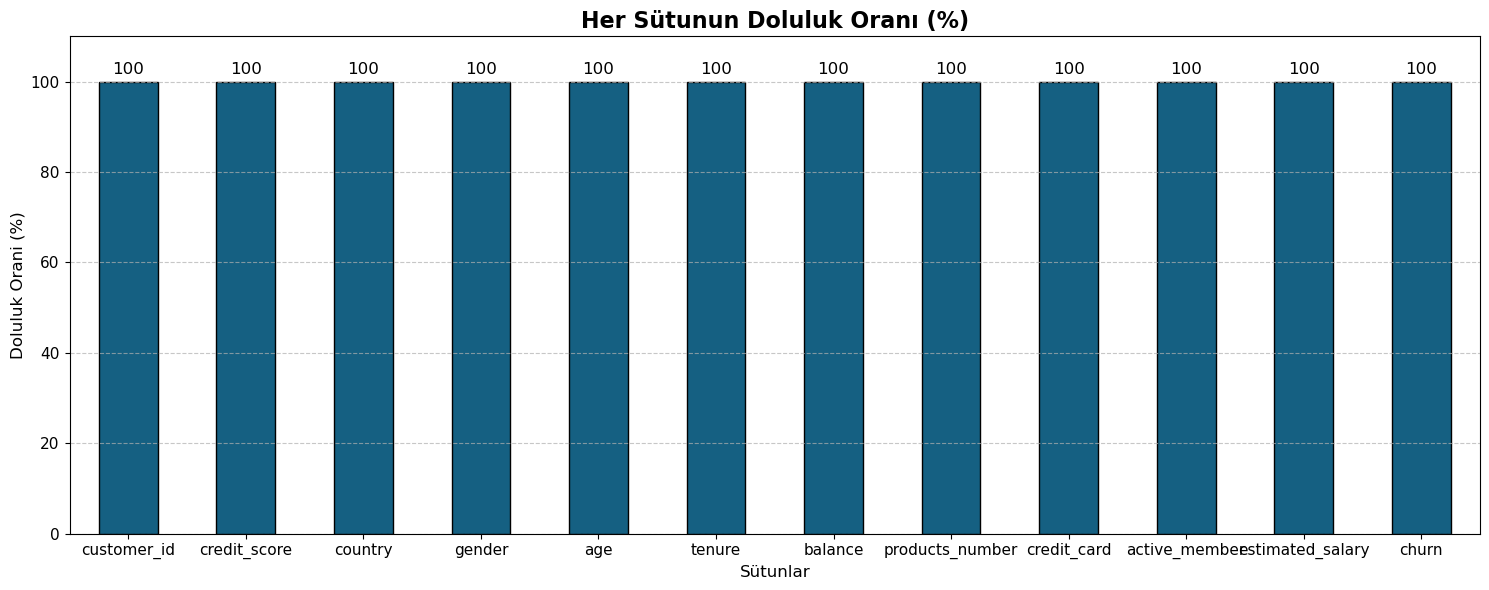

In [22]:
plt.figure(figsize=(15, 6))
ax = doluluk_orani.plot(kind='bar', color='#156082', edgecolor='black')
plt.title('Her Sütunun Doluluk Oranı (%)', fontsize=16, fontweight='bold')
plt.ylabel('Doluluk Orani (%)', fontsize=12)
plt.xlabel('Sütunlar', fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=3, fontsize=12)
plt.ylim(0, doluluk_orani.max() * 1.1)
plt.tight_layout()
plt.show()

In [23]:
doluluk_sayisi = df.notna().sum()
doluluk_sayisi

customer_id         10000
credit_score        10000
country             10000
gender              10000
age                 10000
tenure              10000
balance             10000
products_number     10000
credit_card         10000
active_member       10000
estimated_salary    10000
churn               10000
dtype: int64

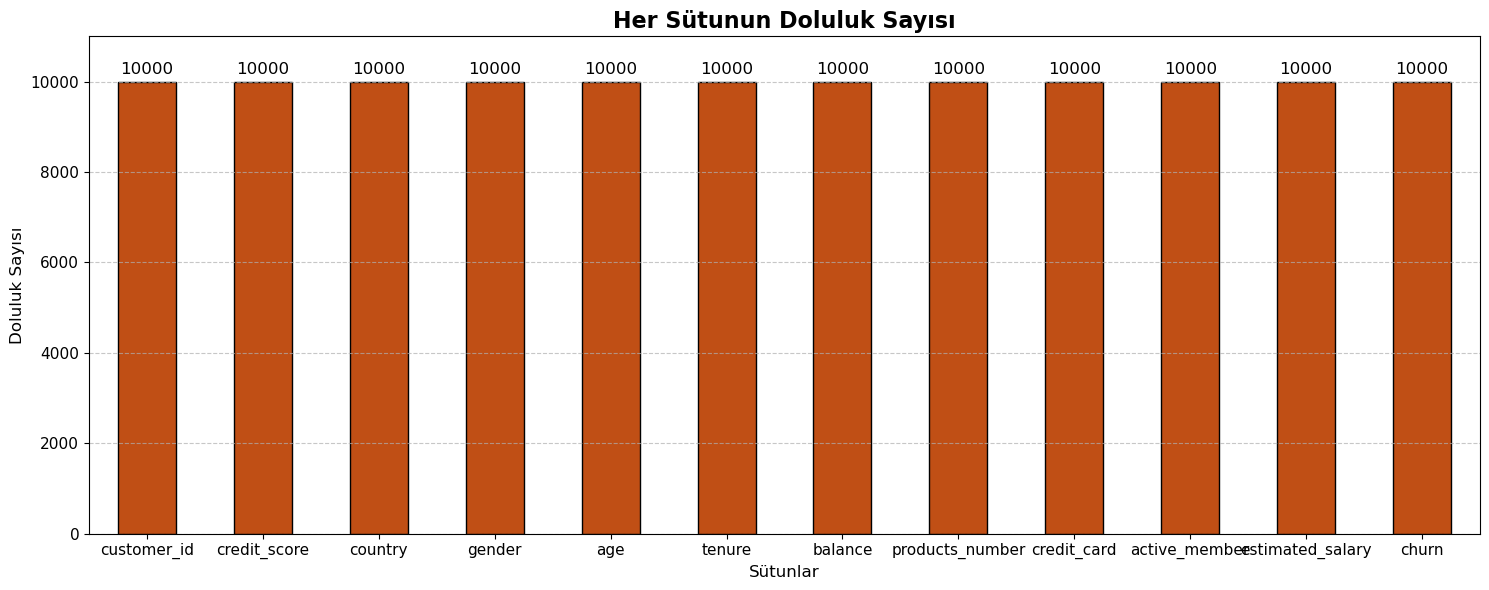

In [24]:
plt.figure(figsize=(15, 6))
ax = doluluk_sayisi.plot(kind='bar', color='#C04F15', edgecolor='black')
plt.title('Her Sütunun Doluluk Sayısı', fontsize=16, fontweight='bold')
plt.ylabel('Doluluk Sayısı', fontsize=12)
plt.xlabel('Sütunlar', fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=3, fontsize=12)
plt.ylim(0, doluluk_sayisi.max() * 1.1)
plt.tight_layout()
plt.show()

In [25]:
df.drop(columns=['customer_id'],inplace=True)
#customer_id her müşteriye özel olduğu için model için kullanışlı değil bu yüzden kaldırdık

In [26]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619.00000,France,Female,38.940375,2,76243.565208,1,1,1.0,101348.88000,1
1,608.00000,Spain,Female,41.000000,1,83807.860000,1,0,1.0,99977.49419,0
2,502.00000,France,Female,42.000000,8,76243.565208,3,1,0.0,113931.57000,1
3,699.00000,France,Female,39.000000,1,0.000000,2,0,1.0,93826.63000,0
4,850.00000,Spain,Female,43.000000,2,125510.820000,1,1,1.0,99977.49419,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771.00000,France,Male,39.000000,5,0.000000,2,1,0.0,96270.64000,0
9996,516.00000,France,Male,38.940375,10,57369.610000,1,1,1.0,101699.77000,0
9997,709.00000,France,Female,36.000000,7,0.000000,1,0,1.0,42085.58000,1
9998,772.00000,France,Male,42.000000,3,75075.310000,2,1,0.0,92888.52000,1


In [27]:
le = LabelEncoder() #kategorik verileri sayılara çevirmek için kullanılır çünkü makine öğrenmesi modelleri metinleri anlayamaz sadece sayılarla çalışır
df['country'] = le.fit_transform(df['country'])
df['gender'] = le.fit_transform(df['gender'])

In [28]:
df.head()
#ilk 5 satırı göster

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619.0,0,0,38.940375,2,76243.565208,1,1,1.0,101348.88000,1
1,608.0,2,0,41.000000,1,83807.860000,1,0,1.0,99977.49419,0
2,502.0,0,0,42.000000,8,76243.565208,3,1,0.0,113931.57000,1
3,699.0,0,0,39.000000,1,0.000000,2,0,1.0,93826.63000,0
4,850.0,2,0,43.000000,2,125510.820000,1,1,1.0,99977.49419,0


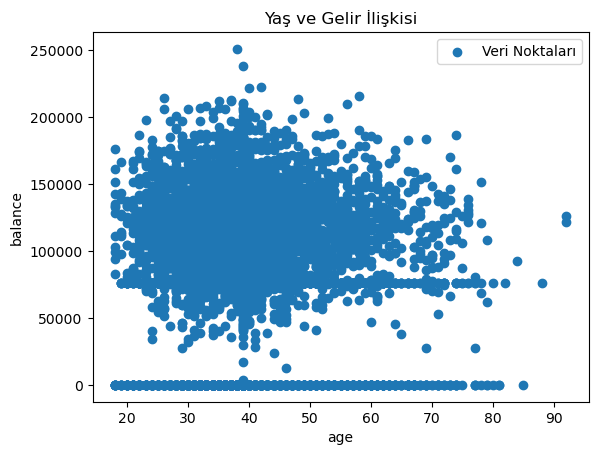

In [29]:
from sklearn.linear_model import LinearRegression
#lineer regression modelini bizim kullanmamızın nedeni iki nokta arasında uzaklık seçerek o uzaklığa uymayan verileri buluyoruz
#o iki nokta arasına uygun olmayan veriler bizim gürültülü verimiz oluyor ve onları aykırı değer olarak işaretliyoruz
#işaretlediğimiz verileri de x işareti ile turuncu şekilde gösteriyoruz
#makine öğrenmesi (ML) kütüphanesinden LinearRegression (Doğrusal Regresyon) modelini içe aktardık
#bağımlı ve bağımsız değişkenler sayısalsa ve iki değişken arasında doğrusal (lineer) ilişki olduğunu biliyorsak bu model kullanılır 

plt.scatter(df['age'], df['balance'], label='Veri Noktaları') #age ve balance sütunlarını nokta grafiği (scatter plot) olarak çizer
plt.xlabel('age')
plt.ylabel('balance') 
plt.title('Yaş ve Gelir İlişkisi')
plt.legend() #grafikteki veri noktalarının neyi temsil ettiğini göstermek için açıklama (legend) ekler
plt.show()

Katsayı (Eğim): 132.27458202214027
Sabit: 71092.74338058961


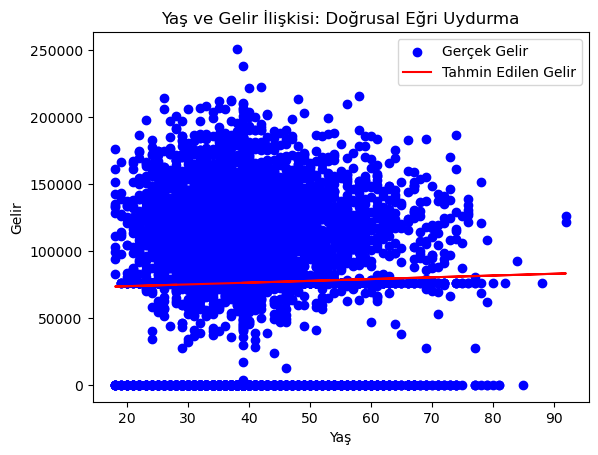

In [30]:
model = LinearRegression()
#yaş ve gelir arasındaki ilişkiye eğri uyduracağız
X = df[['age']]  
y = df['balance']  
model.fit(X, y) #yaş ve gelir arasındaki ilişkiyi matematiksel olarak öğrenmek ve tahmin yapmak için modeli veri üzerinde eğittik
df['Tahmin Edilen Gelir'] = model.predict(X) #modeli kullanarak her yaş için tahmin edilen gelirleri hesaplayıp veri setine ekledik.
#Gelir=(Katsayı)×Yaş + Sabit
print(f"Katsayı (Eğim): {model.coef_[0]}") #yaş değişkenindeki bir birimlik artışın gelire olan etkisini gösteren eğimi yazdırdık.
# Eğer modelde birden fazla bağımsız değişken (özellik) olsaydı, model.coef_ bi
print(f"Sabit: {model.intercept_}") #modelin sabiti ve yaş sıfır olduğunda beklenen geliri gösteren sabit terimi yazdırdık.
plt.scatter(df['age'], df['balance'], label='Gerçek Gelir', color='blue') #nokta grafiği çizer
plt.plot(df['age'], df['Tahmin Edilen Gelir'], label='Tahmin Edilen Gelir', color='red')
plt.xlabel('Yaş')
plt.ylabel('Gelir')
plt.legend() #açıklama gösterir
plt.title('Yaş ve Gelir İlişkisi: Doğrusal Eğri Uydurma')
plt.show()

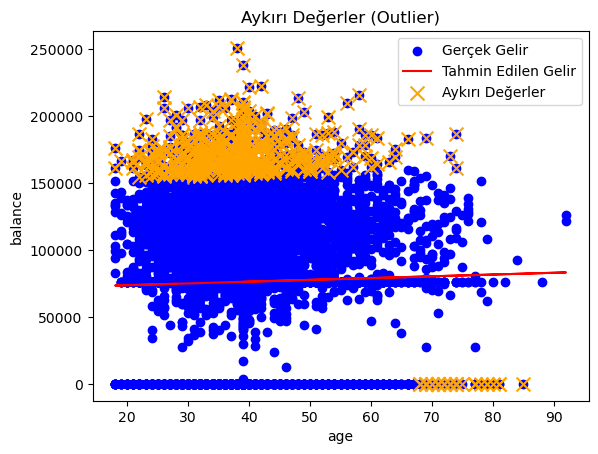

Aykırı Değerler:


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Tahmin Edilen Gelir,Hata
65,650.13675,1,0,36.0,6,169831.46,2,1,1.0,27758.36000,0,75854.628333,93976.831667
72,657.00000,2,0,37.0,0,163607.18,1,0,1.0,99977.49419,0,75986.902915,87620.277085
73,604.00000,1,0,25.0,5,157780.84,2,1,1.0,58426.81000,0,74399.607931,83381.232069
95,515.00000,2,1,35.0,10,176273.95,1,0,1.0,99977.49419,0,75722.353751,100551.596249
138,584.00000,2,0,48.0,2,213146.20,1,1,0.0,75161.25000,1,77441.923318,135704.276682
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9935,735.00000,1,1,28.0,5,160454.15,2,0,1.0,114957.22000,0,74796.431677,85657.718323
9944,744.00000,1,1,41.0,7,190409.34,2,1,1.0,99977.49419,0,76516.001243,113893.338757
9972,758.00000,0,1,26.0,4,155739.76,1,1,0.0,171552.02000,0,74531.882513,81207.877487
9986,673.00000,1,1,47.0,1,183579.54,2,0,1.0,34047.54000,0,77309.648736,106269.891264


In [31]:

df['Hata'] = df['balance'] - df['Tahmin Edilen Gelir'] #hataları hesaplayalım (gerçek gelir - tahmin edilen gelir)
aykiri_degerler = df[np.abs(df['Hata']) > 80000] #hatanın mutlak değeri 80.000’den büyük olan satırları aykırı değerler olarak seçtik
plt.scatter(df['age'], df['balance'], label='Gerçek Gelir', color='blue') #nokta çizer
plt.plot(df['age'], df['Tahmin Edilen Gelir'], label='Tahmin Edilen Gelir', color='red')
plt.scatter(aykiri_degerler['age'], aykiri_degerler['balance'], label='Aykırı Değerler', color='orange', marker='x', s=100)
plt.xlabel('age')
plt.ylabel('balance')
plt.legend()
plt.title('Aykırı Değerler (Outlier)')
plt.show()
print("Aykırı Değerler:")
aykiri_degerler

In [32]:
df = df[np.abs(df['Hata']) <= 80000] 
df.drop(columns=['Tahmin Edilen Gelir','Hata'],inplace=True) #tahmin edilen gelir ve hata sütunlarını veri setinden kaldırdık
#hata değeri 80.000’den büyük olan aykırı satırları veri setinden çıkardık
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619.00000,0,0,38.940375,2,76243.565208,1,1,1.0,101348.88000,1
1,608.00000,2,0,41.000000,1,83807.860000,1,0,1.0,99977.49419,0
2,502.00000,0,0,42.000000,8,76243.565208,3,1,0.0,113931.57000,1
3,699.00000,0,0,39.000000,1,0.000000,2,0,1.0,93826.63000,0
4,850.00000,2,0,43.000000,2,125510.820000,1,1,1.0,99977.49419,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771.00000,0,1,39.000000,5,0.000000,2,1,0.0,96270.64000,0
9996,516.00000,0,1,38.940375,10,57369.610000,1,1,1.0,101699.77000,0
9997,709.00000,0,0,36.000000,7,0.000000,1,0,1.0,42085.58000,1
9998,772.00000,0,1,42.000000,3,75075.310000,2,1,0.0,92888.52000,1


In [33]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() #gelir sütununu Min-Max Normalizasyon ile 0-1 arası değerlere ölçeklendirme
df[['credit_score','age','balance','estimated_salary']] = scaler.fit_transform( df[['credit_score','age','balance','estimated_salary']])
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,0.538,0,0,0.282978,2,0.477322,1,1,1.0,0.506735,1
1,0.516,2,0,0.310811,1,0.524678,1,0,1.0,0.499877,0
2,0.304,0,0,0.324324,8,0.477322,3,1,0.0,0.569654,1
3,0.698,0,0,0.283784,1,0.000000,2,0,1.0,0.469120,0
4,1.000,2,0,0.337838,2,0.785759,1,1,1.0,0.499877,0


In [34]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['churn'])
y = df['churn']
#amacımız müşterinin churn edip etmeyeceğini tahmin etmek olduğu için churn’u bağımlı değişken olarak seçtik
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101) 
#Bazıları 101’i seçer çünkü hatırlaması kolay bir sayı ve “temel veya başlangıç” anlamı çağrıştırır (örn. “101” derslerde giriş seviyesi konuları ifade eder
#randon state amacı karıştırma veya rastgele seçim işlemlerini tekrarlanabilir hale getirmektir; yani aynı kodu her çalıştırdığında aynı rastgele sonuçları elde etmeni sağlar
#veriyi %90 eğitim ve %10 test olacak şekilde rastgele böldük ve sonucu ayrı değişkenlere atadık
train_data = pd.concat([X_train, y_train], axis=1) #eğitim özellikleri ve hedef değişkeni birleştirerek tek bir dataFrame oluşturduk
train_data.to_csv("train_data.csv", index=False) #eğitim veri setini kaydettik fakat indexleri dosyaya eklemedik
test_data = pd.concat([X_test, y_test], axis=1) #test özellikleri ve hedef değişkeni birleştirerek tek bir dataFrame oluşturduk
test_data.to_csv("test_data.csv", index=False) #test veri setini kaydettik fakat indexleri dosyaya eklemedik


**Makine Öğrenmesi 1**

In [35]:
from sklearn.tree import DecisionTreeClassifier
#churn bir kategori olduğu için müşterinin ayrılıp ayrılmayacağını tahmin etmek amacıyla sınıflandırma modeli seçtik
#decision Tree’yi veriyi kolay yorumlayabilmek sayısal ve kategorik özellikleri kullanabilmek ve non-lineer ilişkileri yakalayabilmek için tercih ettik
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
#StratifiedKFold, scikit-learn kütüphanesinde kullanılan bir çapraz doğrulama (cross-validation) yöntemidir ve veri
#sklearn’de kullanılan bir çapraz doğrulama (cross-validation) yöntemi
#çapraz doğrulama modelin performansını daha güvenilir ölçmek için veriyi farklı parçalara böler ve her parçada test eder
#decision Tree (Karar Ağacı) sınıflandırma için kullanılan bir makine öğrenmesi modelidir
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#model performansını ölçmek için doğruluk sınıflandırma raporu ve karışıklık matrisi araçlarını içe aktardık
import matplotlib.pyplot as plt
import seaborn as sns
#gelişmiş ve estetik grafikler çizmek için seaborn kütüphanesini kullandık
import pandas as pd


Cross-validation scores: [0.78348778 0.78433024 0.7767481  0.78854254 0.76074136]
Mean CV accuracy: 0.7787700084245999
Modelin doğruluğu: 0.77
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2033
           1       0.43      0.48      0.45       511

    accuracy                           0.77      2544
   macro avg       0.65      0.66      0.65      2544
weighted avg       0.78      0.77      0.77      2544

Confusion Matrix:
[[1704  329]
 [ 266  245]]


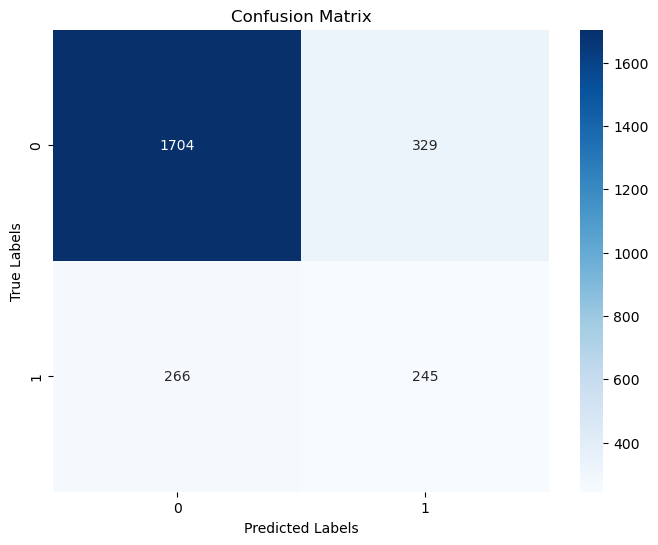

In [36]:
#eğitim veri setini aldım
df1 = pd.read_csv('train_data.csv')

X = df1.drop(columns=['churn']) #özellikleri bağımlı değişken (churn) dışında seçtik model tahmin için sadece bağımsız değişkenleri kullandık
#model hedefi tahmin etmek için yalnızca bağımsız değişkenleri kullanır çünkü hedefi verirsek tahmin anlamsız olur
y = df1['churn'] #hedef değişkeni churn yaptık çünkü sonuca bakmamız lazım

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
#veriyi %70 eğitim ve %30 test olarak böldük sebebi hem öğrenmesini ve hem de doğruluğunu test etmek için
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)
#çapraz doğrulamayı 5 veya 10 ya da daha farklı sayı yapabilirdik 5 yapmamızın nedeni maliyetten kaynaklıdır daha fazla da yapılabilir
#çapraz doğrulama için 5 ve 10 uygun olan ölçüdür onun için katmanlı 5 bölme ayarladık ve shuffle ile karıştırdık
#Bazıları 101’i seçer çünkü hatırlaması kolay bir sayı ve “temel veya başlangıç” anlamı çağrıştırır (örn. “101” derslerde giriş seviyesi konuları ifade eder
#random state amacı karıştırma veya rastgele seçim işlemlerini tekrarlanabilir hale getirmektir; yani aynı kodu her çalıştırdığında aynı rastgele sonuçları elde etmeni sağlar
classifier = DecisionTreeClassifier(random_state=101)

cv_scores = cross_val_score(classifier, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

classifier.fit(X_train, y_train)
#modeli eğitiyoruz çünkü ancak eğitimle veri örüntülerini öğrenip yeni veriler için tahmin yapabilir hale getirir

y_pred = classifier.predict(X_test) #test için tahmin

accuracy = accuracy_score(y_test, y_pred)  #test setinde tahminlerin model için doğruluk skoru
print(f"Modelin doğruluğu: {accuracy:.2f}")

report = classification_report(y_test, y_pred)  #test için sınıflandırma raporu
print("Sınıflandırma Raporu:")
print(report)

#confusion matrix (karışıklık matrisi), sınıflandırma modellerinin performansını değerlendirmek için kullanılır
conf_matrix = confusion_matrix(y_test, y_pred) #Modelin hangi sınıflarda doğru veya yanlış tahmin yaptığını görmek için karışıklık matrisini kullandık
print("Confusion Matrix:")
#Confusion matrix sadece sınıflandırma modellerinde kullanılır 
#çünkü regresyon gibi sürekli değer üreten modellerde sınıf tablosu oluşturulamaz
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues') #karışıklık matrisini mavi tonlarda ısı haritası olarak çizdik ve sayıları hücrelerin içinde gösterdik
plt.title("Confusion Matrix") #annot hücrelerin içindeki değerler fmt formatıdır cmp grafiğin renk paletidir
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
#precision recall f1 score ve support değerleri classification report kütüphanesinden gelmektedir.
#Precision (Kesinlik): gerçekten hangisi pozitif
#Recall (Duyarlılık / Sensitivity): gerçek pozitiflerden kaç tanesini doğru tahmin etmiş
#F1-Score: Precision ve recall’un harmonik ortalamasıdır
#Support: Her sınıfta gerçek örnek sayısı

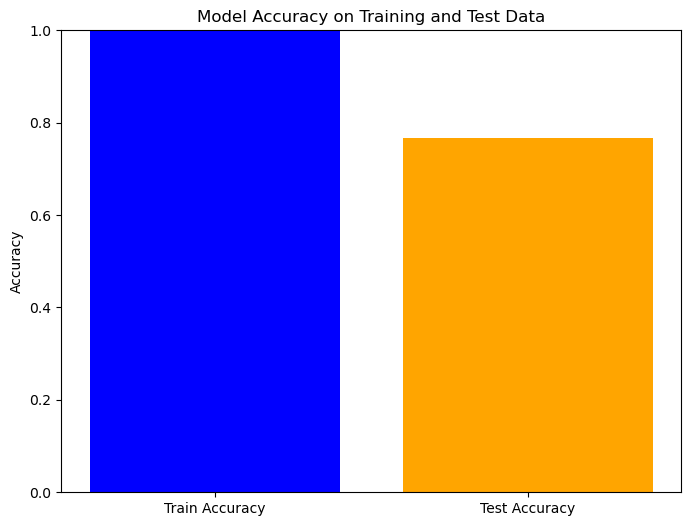

In [37]:
#doğruluk skoru hesaplaması
train_accuracy = accuracy_score(y_train, classifier.predict(X_train)) 
#modeli eğittik ve eğittikten sonraki tahmin ettiği değerlerle gerçek değerleri karşılaştırdık ve doğruluk skorunu hesapladık
test_accuracy = accuracy #eğitim ve test doğruluğu
plt.figure(figsize=(8, 6))
plt.bar(["Train Accuracy", "Test Accuracy"], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.ylim(0, 1) #y eksenini 0 ile 1 arasında sınırladık çünkü doğruluk skoru 0-1 arasıdır
plt.title("Model Accuracy on Training and Test Data")
plt.ylabel("Accuracy")
plt.show()

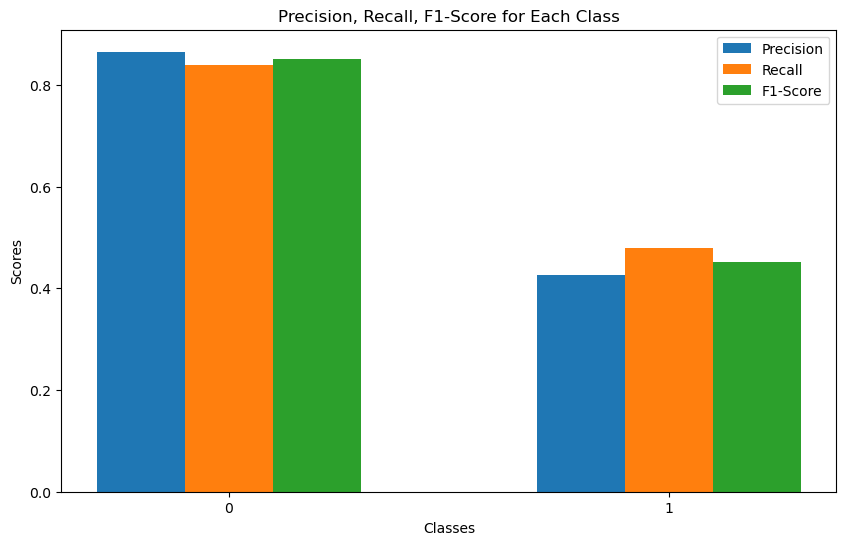

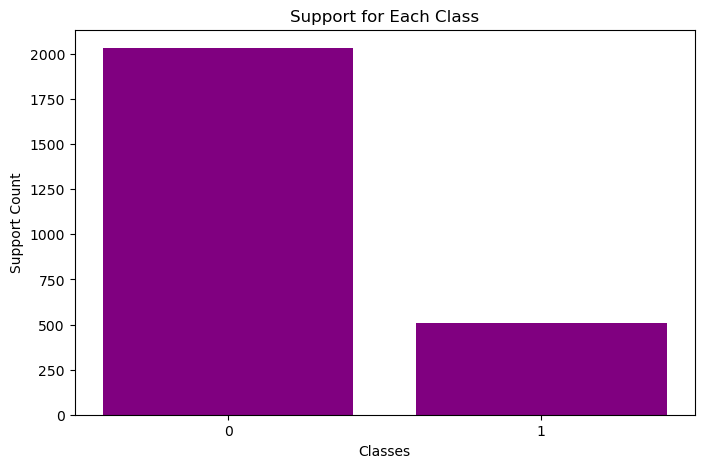

In [38]:
import numpy as np
# sınıflandırma raporundaki recall f1 support ve precision ı burda sonuçlarını tablolaştırdık
#Classification Report'tan Precision Recall F1-Score ve Support değerlerini almak
report = classification_report(y_test, y_pred, output_dict=True)

#Her sınıf için Precision Recall ve F1-score değerlerini alıyoruz
classes = list(report.keys())[:-3] 
#Özet değerler grafikte gösterilirse sınıf bazlı değerlerle karışır
#Sadece gerçek sınıflar alınarak grafik sade ve anlaşılır hale geliyor
# "accuracy", "macro avg", "weighted avg" dışındaki sınıflar
#Grafikte sadece her sınıfın değerlerini göstermek için özet değerleri (accuracy, macro avg, weighted avg) almadık çünkü karışık oluyordu
metrics = ["precision", "recall", "f1-score"]

#değerleri görselleştirme için organize ediyoruz listeleme yapıyoruz
values = {metric: [report[class_][metric] for class_ in classes] for metric in metrics}
support = [report[class_]["support"] for class_ in classes]

#Support, her sınıfta kaç örnek olduğunu gösterir ve mutlak sayıdır.
#Diğer metrikler oran olduğu için aynı eksende çizilirse grafik karışık olur, bu yüzden genellikle ayrı gösterilir.

# 2. Precision, Recall, F1-Score Grafikleri
x = np.arange(len(classes))  #sınıflar için pozisyonlar oluşturuyor x ekseninde onları belirtiyor
width = 0.2  #çubukların genişliği

plt.figure(figsize=(10, 6))
plt.bar(x - width, values["precision"], width, label="Precision")
#precision değerlerini çubuk grafiği ile çiziyor ve çubukları x pozisyonundan biraz sola kaydırıyor çünkü çakışmayı önler
plt.bar(x, values["recall"], width, label="Recall")
#recall değerlerini çubuk grafiği ile çiziyor ve çubukları x pozisyonuna ortalıyor çünkü karşılaştırmayı kolaylaştırmak için
plt.bar(x + width, values["f1-score"], width, label="F1-Score")
#f1-score değerlerini çubuk grafiği ile çiziyor ve çubukları x pozisyonundan biraz sağa kaydırıyor çünkü metrikleri sınıflandırmak için

# Grafiği düzenliyoruz
plt.xticks(x, classes) #x ekseninde sayısal pozisyonlar yerine sınıf isimlerini gösteriyor
#Çünkü grafikte sınıfları sayılarla göstermek kafa karıştırır ve hangi çubuğun hangi sınıfa ait olduğunu anlamak zor olur
plt.xlabel("Classes")
plt.ylabel("Scores")
plt.title("Precision, Recall, F1-Score for Each Class")
plt.legend() #plt.legend() açıklama kutusu ekler 
plt.show()

# 3. Support Grafiği
plt.figure(figsize=(8, 5))
plt.bar(classes, support, color='purple') #her sınıf için support değerlerini mor çubuklarla çiz
plt.title("Support for Each Class")
plt.xlabel("Classes")
plt.ylabel("Support Count")
plt.show()


In [39]:
import joblib
#python’da modelleri veya büyük veri nesnelerini dosyaya kaydetmek ve yüklemek için joblib kütüphanesini kullanırız
joblib.dump(classifier, "DecisionTreeClassifier_model.pkl")
#joblib.dump() fonksiyonu dosya kaydetmeyi sağlar
print("Model başarıyla kaydedildi.")

Model başarıyla kaydedildi.


Modelin doğruluğu: 0.76
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       739
           1       0.44      0.45      0.45       204

    accuracy                           0.76       943
   macro avg       0.64      0.65      0.65       943
weighted avg       0.76      0.76      0.76       943

Confusion Matrix:
[[622 117]
 [112  92]]


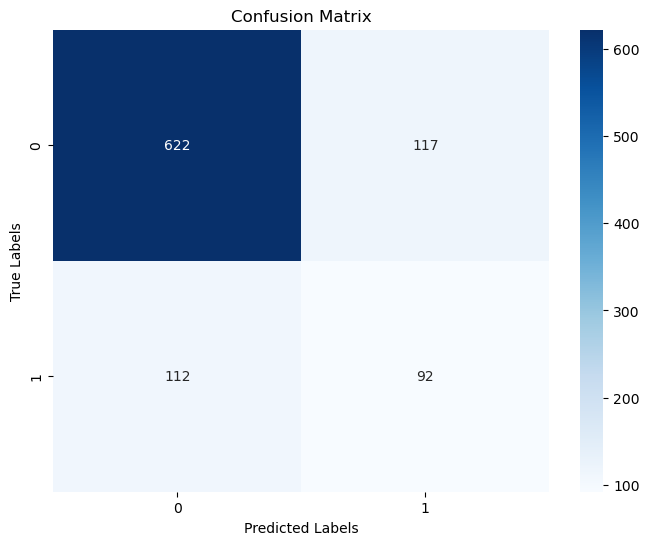

In [40]:
#şimdi biz önceden %70 lik eğitim ele almıştık şimdi %30 testini ele alcaz.
df2 = pd.read_csv('test_data.csv') #test verisini okuduk 

loaded_model = joblib.load("DecisionTreeClassifier_model.pkl")#Diskten kaydettiğimiz Decision Tree modelini tekrar yükleyip loaded_model değişkenine atıyoruz
#Bunun sebebi modeli kaydettikten sonra yükleyerek tekrar eğitmeye gerek kalmadan tahmin yapabiliyoruz
X_test2 = df2.drop(columns=['churn'])
y_test2 = df2['churn']
#Tahmin için X, kontrol için y ayrımı yaptık
#tahmin için sadece bağımsız değişkenleri alıyoruz çünkü bağımlı değişkeni verirsek modelin tahmini anlamsız olur
y_pred2 = loaded_model.predict(X_test2)
#yüklenen model ile test verisi üzerindeki tahminleri hesapla
accuracy = accuracy_score(y_test2, y_pred2)  #doğruluk skoru
print(f"Modelin doğruluğu: {accuracy:.2f}")

report = classification_report(y_test2, y_pred2)  #performans raporu
print("Sınıflandırma Raporu:")
print(report)

conf_matrix = confusion_matrix(y_test2, y_pred2)
#karışıklık matrisini oluşturmanın sebebi modelin hangi sınıfları doğru veya yanlış tahmin ettiğini detaylı olarak görmek
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
#karışıklık matrisini mavi tonlarda ısı haritası olarak çiziyor ve sayıları hücre içine yazıyoruz
#sebebi karışıklık matrisini görsel olarak daha anlaşılır hale getirmek
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

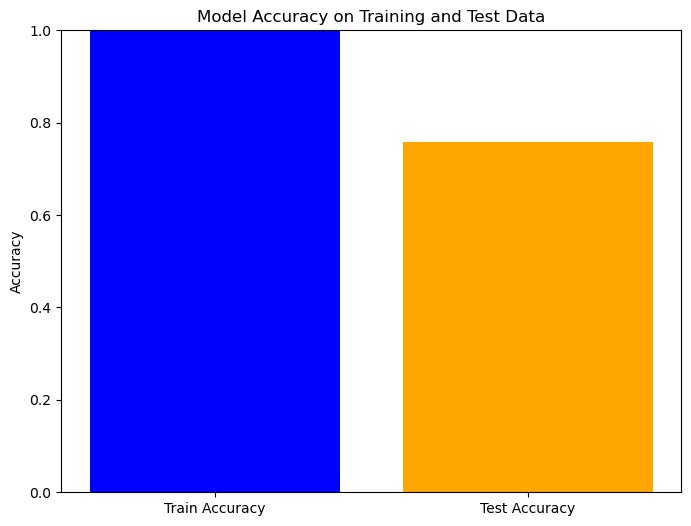

In [41]:
# Eğitim ve test doğruluğu
train_accuracy = accuracy_score(y_train, classifier.predict(X_train))
test_accuracy = accuracy

# Eğitim ve Test Doğruluğu Grafiği
plt.figure(figsize=(8, 6))
plt.bar(["Train Accuracy", "Test Accuracy"], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.title("Model Accuracy on Training and Test Data")
plt.ylabel("Accuracy")
plt.show()

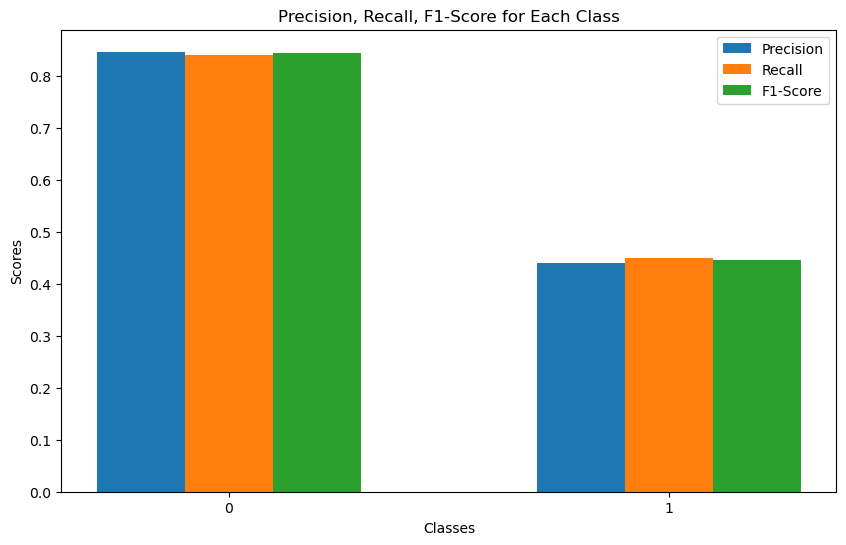

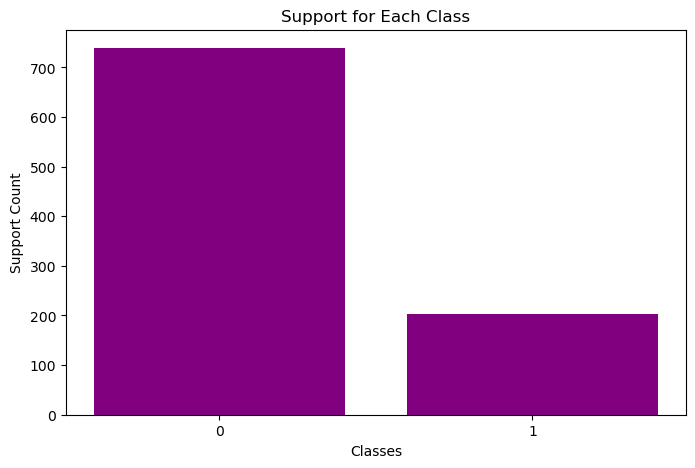

In [42]:
import numpy as np

# 1. Classification Report'tan Precision, Recall, F1-Score ve Support değerlerini almak
report = classification_report(y_test2, y_pred2, output_dict=True)

# Her sınıf için Precision, Recall ve F1-score değerlerini alıyoruz
classes = list(report.keys())[:-3]  # "accuracy", "macro avg", "weighted avg" dışındaki sınıflar
metrics = ["precision", "recall", "f1-score"]
#“accuracy” “macro avg” ve “weighted avg” dışında kalan gerçek sınıfların isimlerini aldık
#çünkü grafikte yalnızca her sınıfın performansını göstermek istiyoruz özet değerler karışıklık yaratır.

# Değerleri görselleştirme için organize ediyoruz listeleme kullandık
values = {metric: [report[class_][metric] for class_ in classes] for metric in metrics}
support = [report[class_]["support"] for class_ in classes]

# 2. Precision, Recall, F1-Score Grafikleri
x = np.arange(len(classes))  # Sınıflar için pozisyonlar
width = 0.2  # Çubukların genişliği

plt.figure(figsize=(10, 6))
plt.bar(x - width, values["precision"], width, label="Precision")
#precision değerlerini çubuk grafiği ile çiziyor ve çubukları x pozisyonundan biraz sola kaydırıyor çünkü çakışmayı önler
plt.bar(x, values["recall"], width, label="Recall")
#recall değerlerini çubuk grafiği ile çiziyor ve çubukları x pozisyonuna ortalıyor çünkü karşılaştırmayı kolaylaştırmak için
plt.bar(x + width, values["f1-score"], width, label="F1-Score")
#f1-score değerlerini çubuk grafiği ile çiziyor ve çubukları x pozisyonundan biraz sağa kaydırıyor çünkü metrikleri sınıflandırmak için

# Grafiği düzenliyoruz
plt.xticks(x, classes) #x eksenine sınıf isimlerini yaz
plt.xlabel("Classes")
plt.ylabel("Scores")
plt.title("Precision, Recall, F1-Score for Each Class")
plt.legend()
plt.show()

# 3. Support Grafiği
plt.figure(figsize=(8, 5))
plt.bar(classes, support, color='purple')
plt.title("Support for Each Class")
plt.xlabel("Classes")
plt.ylabel("Support Count")
plt.show()


**Makine Öğrenmesi 2**

In [43]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Cross-validation scores: [0.84161752 0.85593934 0.84245998 0.85425442 0.84245998]
Mean CV accuracy: 0.8473462510530749
Modelin doğruluğu: 0.84
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2033
           1       0.71      0.39      0.50       511

    accuracy                           0.84      2544
   macro avg       0.78      0.67      0.70      2544
weighted avg       0.83      0.84      0.83      2544

Confusion Matrix:
[[1951   82]
 [ 313  198]]


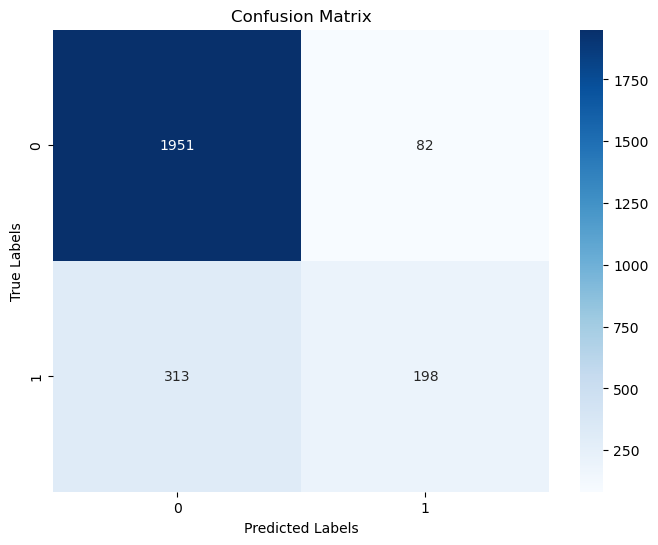

In [45]:
df1 = pd.read_csv('train_data.csv')

X = df1.drop(columns=['churn'])
y = df1['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)
classifier = RandomForestClassifier(random_state=101)

cv_scores = cross_val_score(classifier, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)  # Doğruluk skoru
print(f"Modelin doğruluğu: {accuracy:.2f}")

report = classification_report(y_test, y_pred)  # Performans raporu
print("Sınıflandırma Raporu:")
print(report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

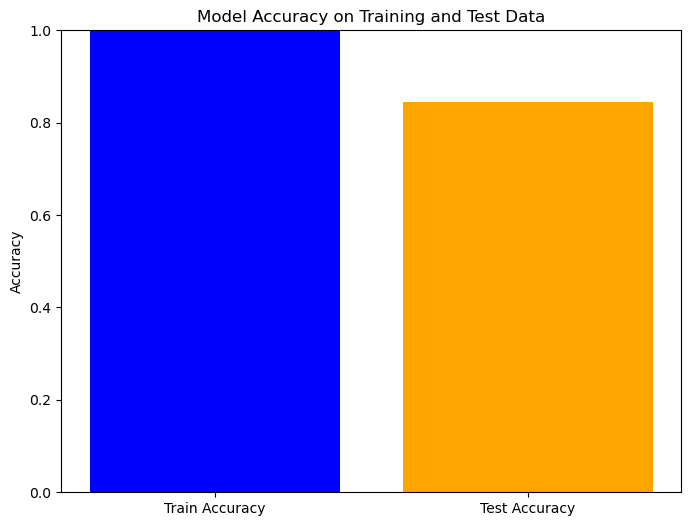

In [46]:
# Eğitim ve test doğruluğu
train_accuracy = accuracy_score(y_train, classifier.predict(X_train))
test_accuracy = accuracy

# Eğitim ve Test Doğruluğu Grafiği
plt.figure(figsize=(8, 6))
plt.bar(["Train Accuracy", "Test Accuracy"], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.title("Model Accuracy on Training and Test Data")
plt.ylabel("Accuracy")
plt.show()

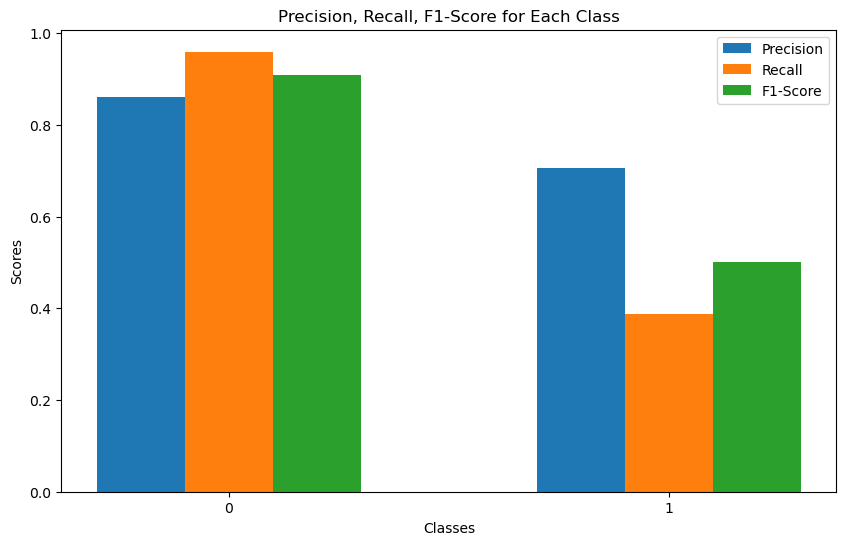

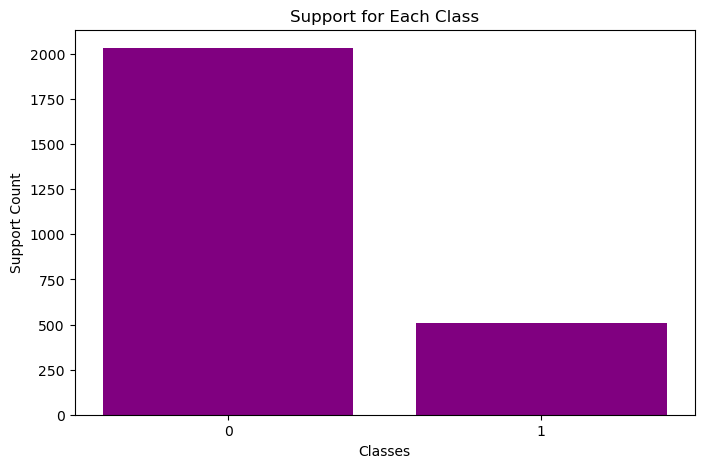

In [47]:
import numpy as np

# 1. Classification Report'tan Precision, Recall, F1-Score ve Support değerlerini almak
report = classification_report(y_test, y_pred, output_dict=True)

# Her sınıf için Precision, Recall ve F1-score değerlerini alıyoruz
classes = list(report.keys())[:-3]  # "accuracy", "macro avg", "weighted avg" dışındaki sınıflar
metrics = ["precision", "recall", "f1-score"]

# Değerleri görselleştirme için organize ediyoruz
values = {metric: [report[class_][metric] for class_ in classes] for metric in metrics}
support = [report[class_]["support"] for class_ in classes]

# 2. Precision, Recall, F1-Score Grafikleri
x = np.arange(len(classes))  # Sınıflar için pozisyonlar
width = 0.2  # Çubukların genişliği

plt.figure(figsize=(10, 6))
plt.bar(x - width, values["precision"], width, label="Precision")
plt.bar(x, values["recall"], width, label="Recall")
plt.bar(x + width, values["f1-score"], width, label="F1-Score")

# Grafiği düzenliyoruz
plt.xticks(x, classes)
plt.xlabel("Classes")
plt.ylabel("Scores")
plt.title("Precision, Recall, F1-Score for Each Class")
plt.legend()
plt.show()

# 3. Support Grafiği
plt.figure(figsize=(8, 5))
plt.bar(classes, support, color='purple')
plt.title("Support for Each Class")
plt.xlabel("Classes")
plt.ylabel("Support Count")
plt.show()


In [48]:
import joblib

joblib.dump(classifier, "random_forest_model.pkl")
print("Model başarıyla kaydedildi.")

Model başarıyla kaydedildi.


Modelin doğruluğu: 0.83
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       739
           1       0.68      0.38      0.48       204

    accuracy                           0.83       943
   macro avg       0.76      0.66      0.69       943
weighted avg       0.81      0.83      0.81       943

Confusion Matrix:
[[702  37]
 [127  77]]


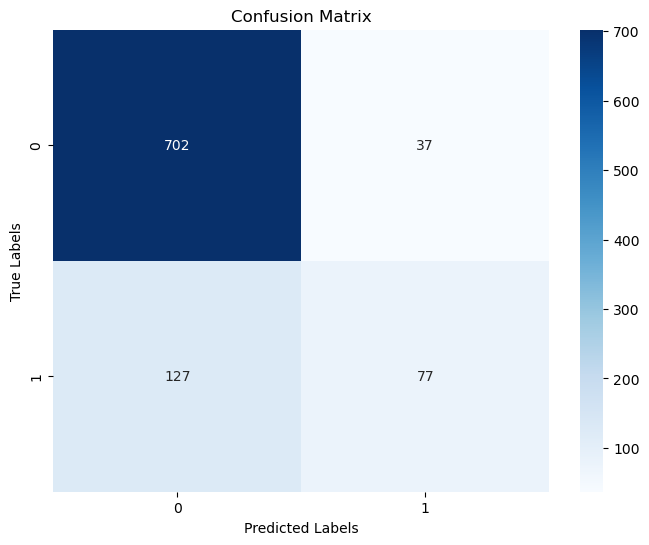

In [49]:
df2 = pd.read_csv('test_data.csv')

loaded_model = joblib.load("random_forest_model.pkl")

X_test2 = df2.drop(columns=['churn'])
y_test2 = df2['churn']

y_pred2 = loaded_model.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred2)  # Doğruluk skoru
print(f"Modelin doğruluğu: {accuracy:.2f}")

report = classification_report(y_test2, y_pred2)  # Performans raporu
print("Sınıflandırma Raporu:")
print(report)

conf_matrix = confusion_matrix(y_test2, y_pred2)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

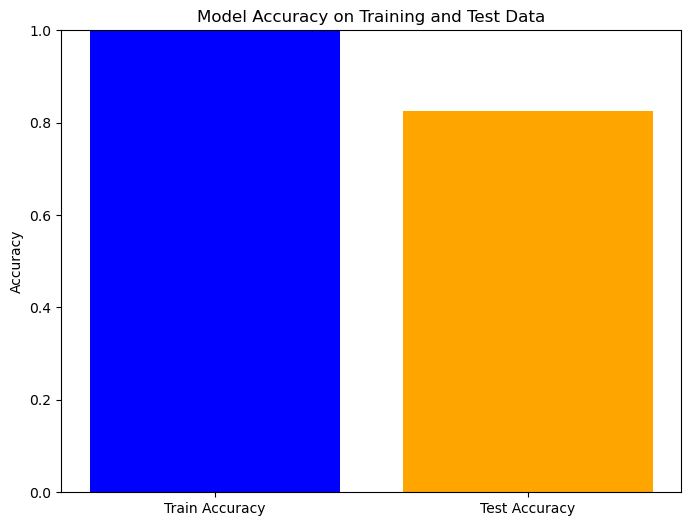

In [50]:
# Eğitim ve test doğruluğu
train_accuracy = accuracy_score(y_train, classifier.predict(X_train))
test_accuracy = accuracy

# Eğitim ve Test Doğruluğu Grafiği
plt.figure(figsize=(8, 6))
plt.bar(["Train Accuracy", "Test Accuracy"], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.title("Model Accuracy on Training and Test Data")
plt.ylabel("Accuracy")
plt.show()

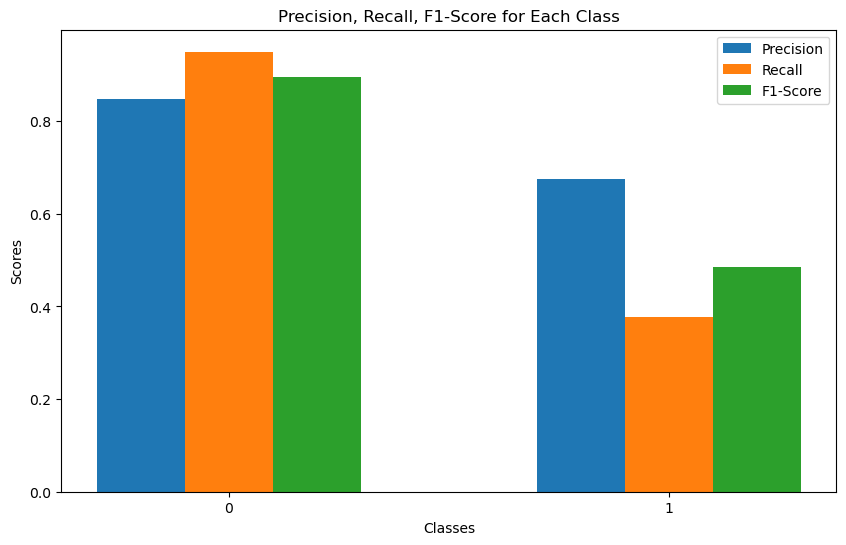

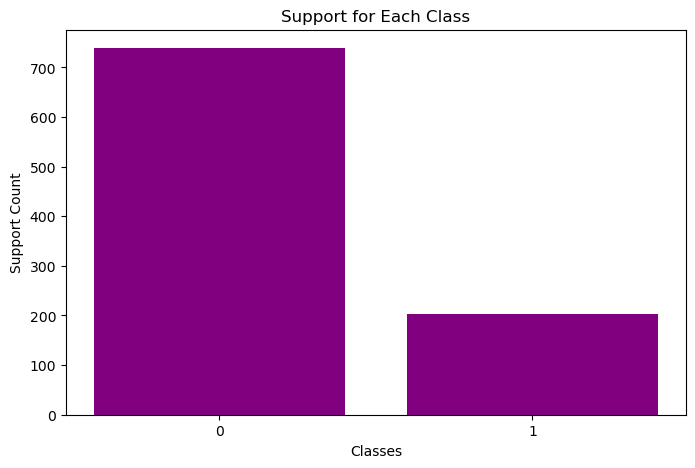

In [51]:
import numpy as np

# 1. Classification Report'tan Precision, Recall, F1-Score ve Support değerlerini almak
report = classification_report(y_test2, y_pred2, output_dict=True)

# Her sınıf için Precision, Recall ve F1-score değerlerini alıyoruz
classes = list(report.keys())[:-3]  # "accuracy", "macro avg", "weighted avg" dışındaki sınıflar
metrics = ["precision", "recall", "f1-score"]

# Değerleri görselleştirme için organize ediyoruz
values = {metric: [report[class_][metric] for class_ in classes] for metric in metrics}
support = [report[class_]["support"] for class_ in classes]

# 2. Precision, Recall, F1-Score Grafikleri
x = np.arange(len(classes))  # Sınıflar için pozisyonlar
width = 0.2  # Çubukların genişliği

plt.figure(figsize=(10, 6))
plt.bar(x - width, values["precision"], width, label="Precision")
plt.bar(x, values["recall"], width, label="Recall")
plt.bar(x + width, values["f1-score"], width, label="F1-Score")

# Grafiği düzenliyoruz
plt.xticks(x, classes)
plt.xlabel("Classes")
plt.ylabel("Scores")
plt.title("Precision, Recall, F1-Score for Each Class")
plt.legend()
plt.show()

# 3. Support Grafiği
plt.figure(figsize=(8, 5))
plt.bar(classes, support, color='purple')
plt.title("Support for Each Class")
plt.xlabel("Classes")
plt.ylabel("Support Count")
plt.show()


**Bayesian Network**

In [52]:
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger('pgmpy').setLevel(logging.ERROR)

#Ortaya çıkabilecek uyarı mesajlarını gizler 
# ve bilgi ve uyarı loglarını susturarak
#önemli mesaj hatalarını gösterir

In [53]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% ! important; }<style>"))
#HTML tabanlı görseller ve stil ayarlarını gösterebilmek için 
# gerekli fonksiyonları import ediyoruz. 

In [54]:
%pip install pgmpy
#Bayesian ağ yapılarını kurmak ve TAN modelini eğitmek
%pip install tabulate
%pip install pandas
# Veri okuma,işleme ve temizleme 
%pip install networkx
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [55]:
import pgmpy as pg
import tabulate as tb
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv("Bank_Customer_Churn_Prediction.csv")

df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [57]:
import pandas as pd

# Etiket listeleri 
churn_labels = ['1. 0', '2. 1']
credit_card_labels = ['1. 0', '2. 1']
active_member_labels = ['1. 0', '2. 1']
gender_labels = ['1. Female', '2. Male']
country_labels = ['1. France', '2. Spain', '3. Germany']

age_group_labels = ['1. Young', '2. Middle-aged', '3. Senior']
credit_score_labels = ['1. Low', '2. Medium', '3. High']
tenure_labels = ['1. Short-term', '2. Mid-term', '3. Long-term']
balance_labels = ['1. Zero', '2. Low', '3. Medium', '4. High']
products_number_labels = ['1. Single', '2. Multiple']
salary_labels = ['1. Low', '2. Medium', '3. High']

#  Mapping fonksiyonu
# Etiket listelerini kullanarak
# “okunabilir kategori -> sayısal kod” dönüşümünü gerçekleştiriyoruz.
def map_labels(value, label_list):
    label_dict = {item.split('.')[1].strip(): item.split('.')[0] for item in label_list}
    return label_dict.get(str(value), "Unknown")

# Sayısal gruplama fonksiyonları ile 
# Sayısal gruplamaları anlaşılır hale getiriyoruz.
def group_age(age):
    if age < 30:
        return "Young"
    elif age < 50:
        return "Middle-aged"
    else:
        return "Senior"

def group_credit_score(score):
    if score < 600:
        return "Low"
    elif score < 700:
        return "Medium"
    else:
        return "High"
#bankada kalma süreleri
def group_tenure(t):
    if t <= 3:
        return "Short-term"
    elif t <= 7:
        return "Mid-term"
    else:
        return "Long-term"
#bakiye
def group_balance(b):
    if b == 0:
        return "Zero"
    elif b < 50000:
        return "Low"
    elif b < 100000:
        return "Medium"
    else:
        return "High"

def group_products(p):
    return "Single" if p == 1 else "Multiple"
# tahmini gelir
def group_salary(s):
    if s < 50000:
        return "Low"
    elif s < 100000:
        return "Medium"
    else:
        return "High"

# Veri setini yükle
df = pd.read_csv("Bank_Customer_Churn_Prediction.csv")

#  Etiketleri uygulama
# Binary kategoriler için sayısal değerleri
# önceden tanımlanan etiketlere çeviriyoruz.
df["Churn_Label"] = df["churn"].apply(lambda x: map_labels(x, churn_labels))
df["CreditCard_Label"] = df["credit_card"].apply(lambda x: map_labels(x, credit_card_labels))
df["ActiveMember_Label"] = df["active_member"].apply(lambda x: map_labels(x, active_member_labels))
df["Gender_Label"] = df["gender"].apply(lambda x: map_labels(x, gender_labels))
df["Country_Label"] = df["country"].apply(lambda x: map_labels(x, country_labels))

#  Sayısal kolonları gruplandır ve etiketle
df["Age_Group"] = df["age"].apply(group_age).apply(lambda x: map_labels(x, age_group_labels))
df["CreditScore_Level"] = df["credit_score"].apply(group_credit_score).apply(lambda x: map_labels(x, credit_score_labels))
df["Tenure_Group"] = df["tenure"].apply(group_tenure).apply(lambda x: map_labels(x, tenure_labels))
df["Balance_Group"] = df["balance"].apply(group_balance).apply(lambda x: map_labels(x, balance_labels))
df["Products_Group"] = df["products_number"].apply(group_products).apply(lambda x: map_labels(x, products_number_labels))
df["Salary_Group"] = df["estimated_salary"].apply(group_salary).apply(lambda x: map_labels(x, salary_labels))

#  Sonuçları göster
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,...,CreditCard_Label,ActiveMember_Label,Gender_Label,Country_Label,Age_Group,CreditScore_Level,Tenure_Group,Balance_Group,Products_Group,Salary_Group
0,15634602,619,France,Female,42,2,0.00,1,1,1,...,2,2,1,1,2,2,1,1,1,3
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,...,1,2,1,2,2,2,1,3,1,3
2,15619304,502,France,Female,42,8,159660.80,3,1,0,...,2,1,1,1,2,1,3,4,2,3
3,15701354,699,France,Female,39,1,0.00,2,0,0,...,1,1,1,1,2,2,1,1,2,2
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,...,2,2,1,2,2,3,1,4,1,2


In [58]:
def make_discrete(df):
    discrete_df = pd.DataFrame()


    # Burada sayısal kolonları gruplandırıyoruz.
    discrete_df['age'] = pd.cut(df['age'], bins=[0, 30, 50, 100], labels=age_group_labels)
    discrete_df['credit_score'] = pd.cut(df['credit_score'], bins=[0, 600, 700, 850], labels=credit_score_labels)
    discrete_df['tenure'] = pd.cut(df['tenure'], bins=[-1, 3, 7, 10], labels=tenure_labels)
    discrete_df['balance'] = pd.cut(df['balance'], bins=[-1, 1, 50000, 100000, df['balance'].max()+1], labels=balance_labels)
    discrete_df['products_number'] = pd.cut(df['products_number'], bins=[0, 1, df['products_number'].max()+1], labels=products_number_labels)
    discrete_df['estimated_salary'] = pd.cut(df['estimated_salary'], bins=[0, 50000, 100000, df['estimated_salary'].max()+1], labels=salary_labels)

     # Binary ve kategorik kolonları doğrudan etiketliyoruz.
    discrete_df['churn'] = df['churn'].map({0: churn_labels[0], 1: churn_labels[1]})
    discrete_df['credit_card'] = df['credit_card'].map({0: credit_card_labels[0], 1: credit_card_labels[1]})
    discrete_df['active_member'] = df['active_member'].map({0: active_member_labels[0], 1: active_member_labels[1]})
    discrete_df['gender'] = df['gender'].map({'Female': gender_labels[0], 'Male': gender_labels[1]})
    discrete_df['country'] = df['country'].map({'France': country_labels[0], 'Spain': country_labels[1], 'Germany': country_labels[2]})

    # Tüm kolonları object türüne çevir
    discrete_df = discrete_df.astype('object')

    return discrete_df



In [59]:
# Veri ayrıklaştırma uygulaması, her sütun belirlediğimiz etiketlerden oluşur.
cat_df = make_discrete(df)

cat_df.head()

,age,credit_score,tenure,balance,products_number,estimated_salary,churn,credit_card,active_member,gender,country
0,2. Middle-aged,2. Medium,1. Short-term,1. Zero,1. Single,3. High,2. 1,2. 1,2. 1,1. Female,1. France
1,2. Middle-aged,2. Medium,1. Short-term,3. Medium,1. Single,3. High,1. 0,1. 0,2. 1,1. Female,2. Spain
2,2. Middle-aged,1. Low,3. Long-term,4. High,2. Multiple,3. High,2. 1,2. 1,1. 0,1. Female,1. France
3,2. Middle-aged,2. Medium,1. Short-term,1. Zero,2. Multiple,2. Medium,1. 0,1. 0,1. 0,1. Female,1. France
4,2. Middle-aged,3. High,1. Short-term,4. High,1. Single,2. Medium,1. 0,2. 1,2. 1,1. Female,2. Spain


In [60]:
#Eğitim ve Test Kümesi Ayrımı 
# %20 test datası Modelin hiç görmediği verilerle
# ne kadar doğru tahmin yaptığını test etmek için ayrıldı. 
# random state 20 yaptık her seferinde aynı sonucu alabilmek için.
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(cat_df, test_size=0.2, random_state=20)

In [61]:
from pgmpy.estimators import TreeSearch
# Veri setindeki yapısal bağımlılıkları öğrenmek için TreeSearch başlatılıyor.
#Ağacın başlangıç düğümü olarak 'Kredi Skoru' seçtik.
#TAN algoritması ile modelin iskeletini oluşturuyoruz.
est = TreeSearch(training_data, root_node="credit_score")
dag = est.estimate(estimator_type="tan", class_node="churn")

Building tree:   0%|          | 0/55.0 [00:00<?, ?it/s]

In [62]:
from pgmpy.estimators import BayesianEstimator, MaximumLikelihoodEstimator, ExpectationMaximization
from pgmpy.models import DiscreteBayesianNetwork

model = DiscreteBayesianNetwork(dag)
#Veri setinde hiç görülmemiş bir durumla karşılaşırsak (Zero Probability),
# modelin çökmemesi ve 0 olasılık vermemesi için Bayesçi tahminleyici kullanıyoruz.
model.fit(data=training_data, estimator=BayesianEstimator, prior_type='BDeu')
#BDeu kullanarak modelin hiç görmediği durumlara bile çok küçükde olsa ihtimal veriyor.
#Modelin öğrendiği tüm Koşullu Olasılık Tabloları (CPT'ler) çağrılıyor.
model.get_cpds()

[<TabularCPD representing P(credit_score:3 | churn:2) at 0x2461020b3e0>,
 <TabularCPD representing P(balance:4 | churn:2, credit_score:3) at 0x246101e5390>,
 <TabularCPD representing P(country:3 | balance:4, churn:2) at 0x246101e7070>,
 <TabularCPD representing P(products_number:2 | balance:4, churn:2) at 0x246102293d0>,
 <TabularCPD representing P(tenure:3 | balance:4, churn:2) at 0x24610152390>,
 <TabularCPD representing P(credit_card:2 | balance:4, churn:2) at 0x24610152b10>,
 <TabularCPD representing P(age:3 | churn:2, country:3) at 0x2461012bac0>,
 <TabularCPD representing P(gender:2 | churn:2, products_number:2) at 0x2461012bd80>,
 <TabularCPD representing P(active_member:2 | age:3, churn:2) at 0x2461024ea30>,
 <TabularCPD representing P(estimated_salary:3 | age:3, churn:2) at 0x2461024ecb0>,
 <TabularCPD representing P(churn:2) at 0x246101d2330>]

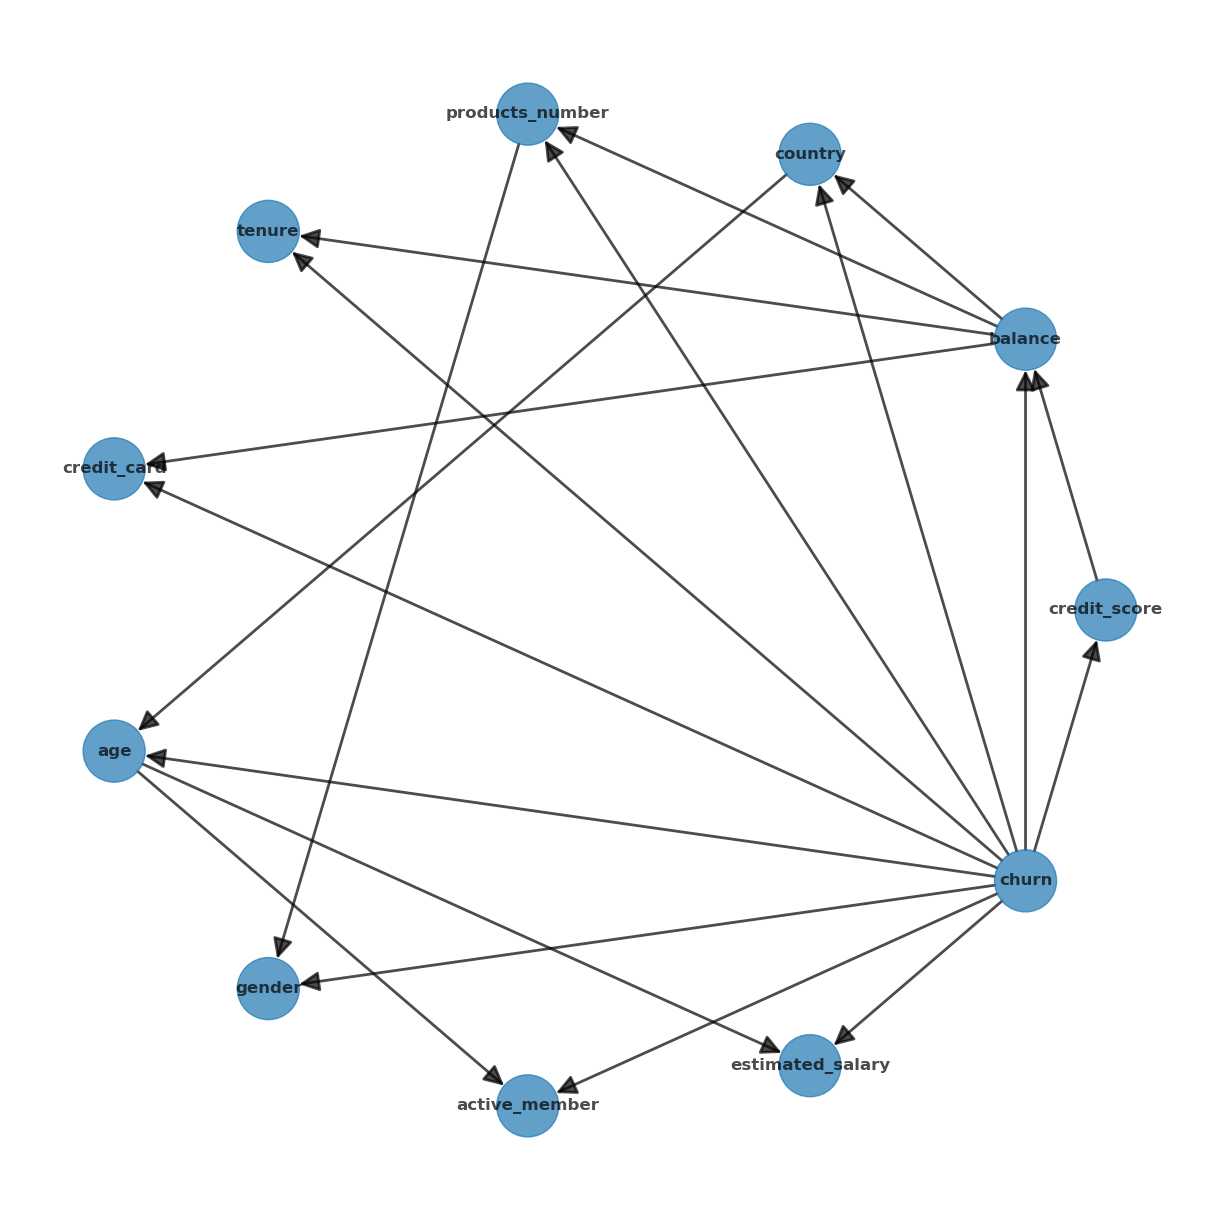

In [63]:
plt.figure(3,figsize=(12,12)) 

G = nx.DiGraph()
G.add_edges_from(dag.edges)
G.add_nodes_from(dag.nodes)
pos = nx.circular_layout(G)
node_count = len(G.nodes)
node_sizes = [2000] * node_count
nx.draw(G,
                pos=pos,
                with_labels=True,
                node_size=node_sizes,
                arrowsize=30,
                alpha=0.7,
                font_weight="bold",
                width=2.0)  # Draw the original graph

plt.show()

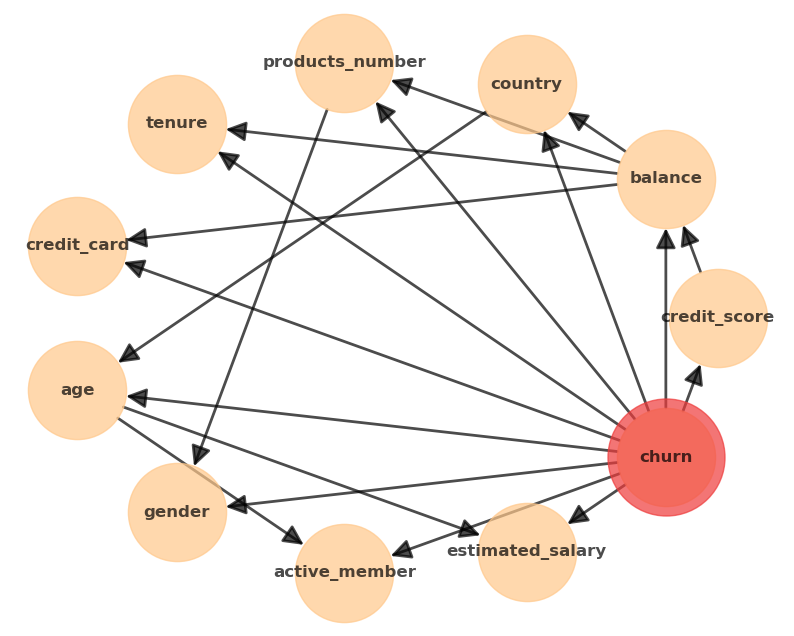

In [64]:
import networkx as nx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
G = nx.DiGraph()
G.add_edges_from(model.edges)
G.add_nodes_from(model.nodes)

pos = nx.circular_layout(G)  # Use circular layout
DAG = G.to_directed()
nx.topological_sort(DAG)

nx.draw_networkx(
    G,
    pos=pos,
    with_labels=True,
    node_size=5000,
    arrowsize=30,
    alpha=0.7,
    font_weight="bold",
    node_color='#FFC88B',
    width=2.0,
    ax=ax
)

tt_g = G.subgraph(nodes=['churn'])
nx.draw(
    tt_g,
    pos=pos,
    with_labels=False,
    arrowsize=0,
    node_size=7100,
    alpha=0.7,
    font_weight="bold",
    node_color='#EE3B3B',
    ax=ax
)

plt.savefig('Tree-Augmented.pdf', facecolor='w', bbox_inches='tight')
plt.show()


In [65]:
#burada modelin doğru tahmininitest ediyoruz. 
from pgmpy.metrics.metrics import correlation_score, log_likelihood_score, structure_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

accuracy_dict = {}

for column in testing_data:
    predict_data = testing_data.copy()
    predict_data.drop(column, axis=1, inplace=True)
    y_pred = model.predict(predict_data)

    if isinstance(y_pred, pd.DataFrame):
        y_pred = y_pred[column] if column in y_pred.columns else y_pred.squeeze()


    accuracy = accuracy_score(testing_data[column], y_pred)
    
    print(f'{column} Accuracy score: {accuracy}')

    accuracy_dict[column] = accuracy

  0%|          | 0/1400 [00:00<?, ?it/s]

age Accuracy score: 0.6755


  0%|          | 0/1262 [00:00<?, ?it/s]

credit_score Accuracy score: 0.395


  0%|          | 0/1287 [00:00<?, ?it/s]

tenure Accuracy score: 0.3945


  0%|          | 0/1391 [00:00<?, ?it/s]

balance Accuracy score: 0.422


  0%|          | 0/1458 [00:00<?, ?it/s]

products_number Accuracy score: 0.5025


  0%|          | 0/1287 [00:00<?, ?it/s]

estimated_salary Accuracy score: 0.522


  0%|          | 0/1544 [00:00<?, ?it/s]

churn Accuracy score: 0.774


  0%|          | 0/1440 [00:00<?, ?it/s]

credit_card Accuracy score: 0.696


  0%|          | 0/1399 [00:00<?, ?it/s]

active_member Accuracy score: 0.509


  0%|          | 0/1425 [00:00<?, ?it/s]

gender Accuracy score: 0.537


  0%|          | 0/1362 [00:00<?, ?it/s]

country Accuracy score: 0.4865


In [66]:
#ne kadar doğru tahmin ortalamasını alıyoruz.
sum = 0
for v in accuracy_dict.values():
    sum += v

accuracy_dict['Average'] = sum / len(accuracy_dict.keys())

accuracy_dict

{'age': 0.6755,
 'credit_score': 0.395,
 'tenure': 0.3945,
 'balance': 0.422,
 'products_number': 0.5025,
 'estimated_salary': 0.522,
 'churn': 0.774,
 'credit_card': 0.696,
 'active_member': 0.509,
 'gender': 0.537,
 'country': 0.4865,
 'Average': 0.5376363636363637}

In [67]:
#Modelin sadece doğruluk değerlerine değil, F1-Score ve Recall değerlerine bakarak dengesizliğini
#Log-Likelihood ve Structure Score hesaplayarak istatiksel boyutunada bakıyoruz.
f1 = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=f1_score, return_summary=False)
acc = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=accuracy_score, return_summary=False)
pr = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=precision_score, return_summary=False)
recall = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=recall_score, return_summary=False)
ls = log_likelihood_score(model=model, data=testing_data)
ss = structure_score(model=model, data=testing_data, scoring_method='bdeu')


print(f'F1 score: {f1}')
print(f'Accuracy score: {acc}')
print(f'Precision score: {pr}')
print(f'Recall score: {recall}')
print(f'Log-likilihood score: {ls}')
print(f'Strcture score: {ss}')

F1 score: 0.0
Accuracy score: 0.18181818181818182
Precision score: 0.0
Recall score: 0.0
Log-likilihood score: -17972.48589252598
Strcture score: -18165.009918934415


In [68]:
print(f'Check model: {model.check_model()}\n')
#bütün olasılıkların toplamı 1 ediyor mu?
for cpd in model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd * 100, '\n')

Check model: True

CPT of credit_score:
+-------------------------+--------------------+-------------------+
| churn                   | churn(1. 0)        | churn(2. 1)       |
+-------------------------+--------------------+-------------------+
| credit_score(1. Low)    | 30.679279989488894 | 33.31328320802005 |
+-------------------------+--------------------+-------------------+
| credit_score(2. Medium) | 38.199973722244124 | 36.50125313283208 |
+-------------------------+--------------------+-------------------+
| credit_score(3. High)   | 31.120746288266982 | 30.18546365914787 |
+-------------------------+--------------------+-------------------+ 

CPT of balance:
+--------------------+-----+-----------------------+
| churn              | ... | churn(2. 1)           |
+--------------------+-----+-----------------------+
| credit_score       | ... | credit_score(3. High) |
+--------------------+-----+-----------------------+
| balance(1. Zero)   | ... | 22.558950514779145    |
+--